In [1]:
try:
    import rickpy
    rickpy.use_dev_packages(['rickpy','scidash/sciunit','scidash/neuronunit','neuroml/pyNeuroML'])
    import imp
    imp.reload(rickpy)
    print("Using local development versions of packages")
except ImportError:
    print("Using packages from system path")

Using local development versions of packages


In [2]:
%matplotlib notebook
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
import sciunit
import neuronunit
from neuronunit import aibs
from neuronunit.models.reduced import ReducedModel

In [5]:
# This example is from https://github.com/OpenSourceBrain/IzhikevichModel.
IZHIKEVICH_PATH = os.path.join('/home/mnt/osb/IzhikevichModel') # Replace this the path to your 
                                                                       # working copy of 
                                                                       # github.com/OpenSourceBrain/IzhikevichModel.  
IZHIKEVICH_PATH = os.getcwd()
LEMS_MODEL_PATH = os.path.join(IZHIKEVICH_PATH,'NeuroML2/LEMS_2007One.xml')

In [6]:
import quantities as pq
from neuronunit import tests as nu_tests, neuroelectro
neuron = {'nlex_id': 'nifext_50'} # Layer V pyramidal cell
tests = []

dataset_id = 354190013  # Internal ID that AIBS uses for a particular Scnn1a-Tg2-Cre 
                        # Primary visual area, layer 5 neuron.
observation = aibs.get_observation(dataset_id,'rheobase')
tests += [nu_tests.RheobaseTest(observation=observation)]
    
test_class_params = [(nu_tests.InputResistanceTest,None),
                     (nu_tests.TimeConstantTest,None),
                     (nu_tests.CapacitanceTest,None),
                     (nu_tests.RestingPotentialTest,None),
                     (nu_tests.InjectedCurrentAPWidthTest,None),
                     (nu_tests.InjectedCurrentAPAmplitudeTest,None),
                     (nu_tests.InjectedCurrentAPThresholdTest,None)]

for cls,params in test_class_params:
    observation = cls.neuroelectro_summary_observation(neuron)
    tests += [cls(observation,params=params)]
    
def update_amplitude(test,tests,score):
    rheobase = score.prediction['value']
    for i in [5,6,7]:
        print(tests[i])
        # Set current injection to just suprathreshold
        tests[i].params['injected_square_current']['amplitude'] = rheobase*1.01 
    
hooks = {tests[0]:{'f':update_amplitude}}
suite = sciunit.TestSuite("vm_suite",tests,hooks=hooks)

INFO:allensdk.api.api:Downloading URL: http://api.brain-map.org/api/v2/data/query.json?q=model::Specimen,rma::criteria,[id$eq'354190013'],rma::include,structure,donor(transgenic_lines),specimen_tags,cell_soma_locations,ephys_features,data_sets,neuron_reconstructions,cell_reporter,rma::options[num_rows$eq'all']
INFO:allensdk.api.api:Downloading URL: http://api.brain-map.org/api/v2/data/query.json?q=model::EphysSweep,rma::criteria,[specimen_id$eq354190013],rma::options[num_rows$eq'all']


Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Input+Resistance
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Membrane+Time+Constant
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Cell+Capacitance
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Resting+membrane+potential
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Spike+Half-Width
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Spike+Amplitude
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Spike+Threshold


In [7]:
model = ReducedModel(LEMS_MODEL_PATH,name='vanilla')
suite.judge(model)

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/vanilla.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/vanilla.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for vanilla_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS_Iext.mod exis

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
vanilla,Ratio = 0.40,Z = -0.53,Z = 0.28,Z = 0.52,Z = 1.26,Z = -0.62,Z = -1.72,Z = 2.39


In [8]:
models = []
for vr in np.linspace(-75,-50,6):
    model = ReducedModel(LEMS_MODEL_PATH, 
                         name='V_rest=%dmV' % vr, 
                         attrs={'//izhikevich2007Cell':
                                    {'vr':'%d mV' % vr}
                               })
    #model.skip_run = True
    models.append(model)
suite.set_verbose(False) # Turn off most print statements.  
score_matrix = suite.judge(models)
score_matrix.show_mean = True
score_matrix.sortable = True
score_matrix

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-75mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-75mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-75mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-70mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-70mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-70mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-65mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-65mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-65mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-60mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-60mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-60mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-55mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-55mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-55mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists but is different
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

pyNeuroML >>> Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/conda/lib/python3.5/site-packages/pyneuroml/lib/jNeuroML-0.8.0-jar-with-dependencies.jar"  "/tmp/V_rest=-50mV.xml"  -neuron -run -nogui) in directory: .
pyNeuroML >>> Command completed. Output: 
pyNeuroML >>>   jNeuroML >>   jNeuroML v0.8.0
pyNeuroML >>>   jNeuroML >>  (INFO) Reading from: /tmp/V_rest=-50mV.xml
pyNeuroML >>>   jNeuroML >>  (INFO) Creating NeuronWriter for V_rest=-50mV_nrn.py
pyNeuroML >>>   jNeuroML >>  (INFO) Adding simulation Component(id=sim1 type=Simulation) of network/component: net1 (Type: network)
pyNeuroML >>>   jNeuroML >>  (INFO) Adding population: RS_pop
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/RS.mod exists and is identical
pyNeuroML >>>   jNeuroML >>  (INFO) Adding projections/connections...
pyNeuroML >>>   jNeuroML >>  (INFO) -- Writing to mod: /tmp/RS_Iext.mod
pyNeuroML >>>   jNeuroML >>  (INFO) File /tmp/R

<IPython.core.display.Javascript object>

,Mean,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
V_rest=-75mV,0.412,Ratio = 1.39,Z = -0.96,Z = -0.23,Z = 1.12,Z = -1.03,Z = -0.75,Z = -1.32,Z = 1.76
V_rest=-70mV,0.514,Ratio = 1.00,Z = -0.87,Z = -0.12,Z = 0.92,Z = -0.27,Z = -0.71,Z = -1.45,Z = 1.97
V_rest=-65mV,0.500,Ratio = 0.66,Z = -0.73,Z = 0.04,Z = 0.71,Z = 0.50,Z = -0.66,Z = -1.58,Z = 2.18
V_rest=-60mV,0.427,Ratio = 0.40,Z = -0.53,Z = 0.28,Z = 0.52,Z = 1.26,Z = -0.62,Z = -1.72,Z = 2.39
V_rest=-55mV,0.379,Ratio = 0.20,Z = -0.21,Z = 0.69,Z = 0.35,Z = 2.03,Z = -0.57,Z = -1.85,Z = 2.61
V_rest=-50mV,0.301,Ratio = 0.07,Z = 0.29,Z = 1.42,Z = 0.23,Z = 2.79,Z = -0.52,Z = -1.99,Z = 2.82


In [9]:
score_matrix.view()

<IPython.core.display.Javascript object>

,Mean,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
V_rest=-75mV,0.412,Ratio = 1.39,Z = -0.96,Z = -0.23,Z = 1.12,Z = -1.03,Z = -0.75,Z = -1.32,Z = 1.76
V_rest=-70mV,0.514,Ratio = 1.00,Z = -0.87,Z = -0.12,Z = 0.92,Z = -0.27,Z = -0.71,Z = -1.45,Z = 1.97
V_rest=-65mV,0.500,Ratio = 0.66,Z = -0.73,Z = 0.04,Z = 0.71,Z = 0.50,Z = -0.66,Z = -1.58,Z = 2.18
V_rest=-60mV,0.427,Ratio = 0.40,Z = -0.53,Z = 0.28,Z = 0.52,Z = 1.26,Z = -0.62,Z = -1.72,Z = 2.39
V_rest=-55mV,0.379,Ratio = 0.20,Z = -0.21,Z = 0.69,Z = 0.35,Z = 2.03,Z = -0.57,Z = -1.85,Z = 2.61
V_rest=-50mV,0.301,Ratio = 0.07,Z = 0.29,Z = 1.42,Z = 0.23,Z = 2.79,Z = -0.52,Z = -1.99,Z = 2.82


<IPython.core.display.Javascript object>


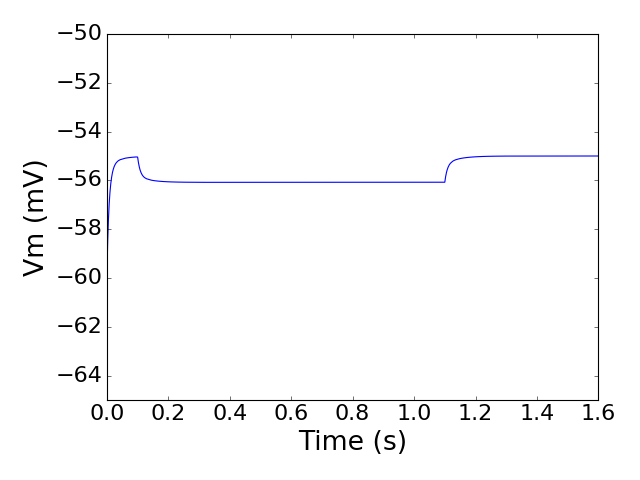

In [10]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
vm = score_matrix[tests[3]][4].related_data['vm'].rescale('mV') # Plot the rheobase current (test 3) 
                                                                # from v_rest = -55 mV (model 4)
ax = plt.gca()
ax.plot(vm.times,vm)
y_min = float(vm.min()-5.0*pq.mV)
y_max = float(vm.max()+5.0*pq.mV)
ax.set_xlim(0,1.6)
ax.set_ylim(y_min,y_max)
ax.set_xlabel('Time (s)',size=24)
ax.set_ylabel('Vm (mV)',size=24);
plt.tight_layout()

In [8]:
"""
for a in np.linspace(0.015,0.045,2):
    for b in np.linspace(-3.5,-0.5,2):
        for C in np.linspace(50,150,3):
            for k in np.linspace(0.4,1.0,3):
                model = ReducedModel(LEMS_MODEL_PATH, 
                             name='a=%.3fperms_b=%.1fnS_C=%dpF_k=%.2f' % (a,b,C,k), 
                             attrs={'//izhikevich2007Cell':
                                        {'b':'%.1f nS' % b,
                                         'a':'%.3f per_ms' % a,
                                         'C':'%d pF' % C,
                                         'k':'%.2f nS_per_mV' % k,
                                         'vr':'-68 mV',
                                         'vpeak':'45 mV'}
                                   })
                #model.skip_run = True
                models3.append(model)
score_matrix3 = suite.judge(models3, verbose=False)
score_matrix3.show_mean = True
score_matrix3.sortable = True
score_matrix3
""";

In [93]:
models2 = []
for i,a in enumerate(np.linspace(0.015,0.045,7)):
    for j,b in enumerate(np.linspace(-3.5,-0.5,7)):
        model = ReducedModel(LEMS_MODEL_PATH, 
                     name='a=%.3fperms_b=%.1fnS' % (a,b), 
                     attrs={'//izhikevich2007Cell':
                                {'b':'%.1f nS' % b,
                                 'a':'%.3f per_ms' % a,
                                 'C':'150 pF',
                                 'k':'0.70 nS_per_mV',
                                 'vr':'-68 mV',
                                 'vpeak':'45 mV'}
                           })
        #model.skip_run = True
        models2.append(model)
score_matrix2 = suite.judge(models2)
score_matrix2.show_mean = True
score_matrix2.sortable = True
score_matrix2.view()

InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.] 2 2
[ 0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.] 3 3
[ 0.00113  0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.] 2 2
[ 0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.  452.  452.] 5 5
[ 0.00113  0.00113  0.00113  0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09   2.82500000e-09
   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.] 3 3
[ 0.00113  0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.] 2 2
[ 0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.] 1 1
[ 0.00113] s 2.5e-06 s [  2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.] 1 1
[ 0.0011275] s 2.5e-06 s [  2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.  452.  452.  452.  465.] 7 7
[ 0.00113    0.00113    0.00113    0.00113    0.00113    0.00113    0.0011625] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09   2.82500000e-09
   2.82500000e-09   2.82500000e-09   2.90625000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.  452.  442.] 5 5
[ 0.00113   0.00113   0.00113   0.00113   0.001105] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09   2.82500000e-09
   2.76250000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 452.  452.  452.] 3 3
[ 0.00113  0.00113  0.00113] s 2.5e-06 s [  2.82500000e-09   2.82500000e-09   2.82500000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


[ 451.  451.] 2 2
[ 0.0011275  0.0011275] s 2.5e-06 s [  2.81875000e-09   2.81875000e-09] s**2


<IPython.core.display.Javascript object>

,Mean,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
a=0.015perms_b=-3.5nS,0.482,Ratio = 0.73,Z = -0.66,Z = 1.45,Z = 1.51,Z = 0.08,Z = -0.12,Z = -0.94,Z = 2.43
a=0.015perms_b=-3.0nS,0.503,Ratio = 0.77,Z = -0.70,Z = 1.09,Z = 1.35,Z = 0.08,Z = -0.12,Z = -0.95,Z = 2.44
a=0.015perms_b=-2.5nS,0.527,Ratio = 0.81,Z = -0.73,Z = 0.79,Z = 1.23,Z = 0.08,Z = -0.12,Z = -0.95,Z = 2.45
a=0.015perms_b=-2.0nS,0.551,Ratio = 0.86,Z = -0.77,Z = 0.55,Z = 1.13,Z = 0.08,Z = -0.12,Z = -0.96,Z = 2.46
a=0.015perms_b=-1.5nS,0.574,Ratio = 0.91,Z = -0.80,Z = 0.34,Z = 1.05,Z = 0.08,Z = -0.12,Z = -0.96,Z = 2.46
a=0.015perms_b=-1.0nS,0.595,Ratio = 0.96,Z = -0.83,Z = 0.17,Z = 0.99,Z = 0.08,Z = -0.12,Z = -0.97,Z = 2.47
a=0.015perms_b=-0.5nS,0.612,Ratio = 1.01,Z = -0.86,Z = 0.02,Z = 0.94,Z = 0.08,Z = -0.12,Z = -0.98,Z = 2.48
a=0.020perms_b=-3.5nS,0.502,Ratio = 0.72,Z = -0.66,Z = 1.16,Z = 1.30,Z = 0.08,Z = -0.12,Z = -0.94,Z = 2.42
a=0.020perms_b=-3.0nS,0.522,Ratio = 0.77,Z = -0.70,Z = 0.89,Z = 1.21,Z = 0.08,Z = -0.12,Z = -0.95,Z = 2.44
a=0.020perms_b=-2.5nS,0.543,Ratio = 0.81,Z = -0.74,Z = 0.65,Z = 1.13,Z = 0.08,Z = -0.12,Z = -0.95,Z = 2.44


In [94]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
heatmap = np.zeros((7,7))
for i,a in enumerate(np.linspace(0.015,0.045,7)):
    for j,b in enumerate(np.linspace(-3.5,-0.5,7)):
        for model in score_matrix2.models:
            if model.name == 'a=%.3fperms_b=%.1fnS' % (a,b):
                heatmap[i,j] = 20*(score_matrix2[model].mean() - 0.8070)+0.8070#[tests[0]].score
#heatmap[2,0] = np.nan
plt.pcolor(heatmap,cmap='magma')
plt.yticks(np.arange(7)+0.5,np.linspace(0.015,0.045,7))
plt.ylabel('Izhikevich Parameter $a$')
plt.xticks(np.arange(7)+0.5,np.linspace(-3.5,-0.5,7))
plt.xlabel('Izhikevich Parameter $b$')
cbar = plt.colorbar()
cbar.set_label('Mean Test Score',size=15)
cbar.ax.tick_params(labelsize=15) 
plt.tight_layout()
np.save('heatmap',heatmap)

In [11]:
"""
from neuronunit.tests.dynamics import TFRTypeTest,BurstinessTest

is_bursty = BurstinessTest(observation={'cv_mean':1.5, 'cv_std':1.0})
score_matrix2 = is_bursty.judge(models)
score_matrix2
""";

In [12]:
"""
#rickpy.refresh_objects(locals(),modules=None)
rickpy.refresh_objects(locals().copy(),modules=['sciunit','neuronunit'])
isinstance(tests[0],sciunit.Test) # Should print True if successful
""";